혼자 공부하는 머신러닝 

1. 생선 분류 문제

한빛 마켓에서 파는 생선 = ['도미','곤들매기','농어','강꼬치고기','로치','빙어','송어']

도미의 길이와 무게

In [ ]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

두 특성을 숫자로 보는 것보다 그래프로 표현하면 데이터 이해가 쉬움.

길이_x축, 무게_y축 > 각 도미를 그래프에 점으로 표시 > 점으로 그린 그래프 >> 산점도 scatter함수

파이썬에서 과학계산용 그래프를 그리는 대표적 패키지 = %matplotlib

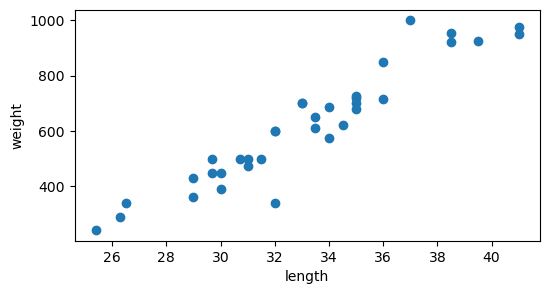

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

>> 산점도 그래프가 일직선에 가까운 형태로 나타나는 것 == 선형적

빙어 데이터 _ 

In [5]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

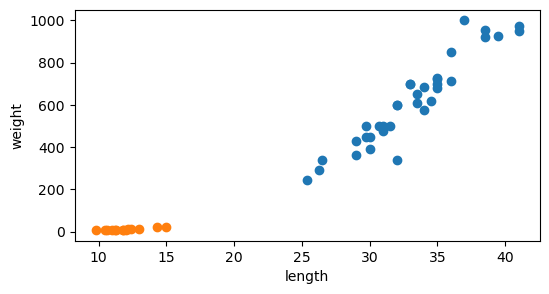

In [6]:
plt.figure(figsize=(6,3))
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#### K-최근접 이웃 사용(K-nearest Neighbors)

k-최근접 이웃 알고리즘을 사용하기 위해서는 도미와 방어의 데이터를 하나로 합쳐야 함.

In [7]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [8]:
length, weight

([25.4,
  26.3,
  26.5,
  29.0,
  29.0,
  29.7,
  29.7,
  30.0,
  30.0,
  30.7,
  31.0,
  31.0,
  31.5,
  32.0,
  32.0,
  32.0,
  33.0,
  33.0,
  33.5,
  33.5,
  34.0,
  34.0,
  34.5,
  35.0,
  35.0,
  35.0,
  35.0,
  36.0,
  36.0,
  37.0,
  38.5,
  38.5,
  39.5,
  41.0,
  41.0,
  9.8,
  10.5,
  10.6,
  11.0,
  11.2,
  11.3,
  11.8,
  11.8,
  12.0,
  12.2,
  12.4,
  13.0,
  14.3,
  15.0],
 [242.0,
  290.0,
  340.0,
  363.0,
  430.0,
  450.0,
  500.0,
  390.0,
  450.0,
  500.0,
  475.0,
  500.0,
  500.0,
  340.0,
  600.0,
  600.0,
  700.0,
  700.0,
  610.0,
  650.0,
  575.0,
  685.0,
  620.0,
  680.0,
  700.0,
  725.0,
  720.0,
  714.0,
  850.0,
  1000.0,
  920.0,
  955.0,
  925.0,
  975.0,
  950.0,
  6.7,
  7.5,
  7.0,
  9.7,
  9.8,
  8.7,
  10.0,
  9.9,
  9.8,
  12.2,
  13.4,
  12.2,
  19.7,
  19.9])

>> 두 개의 리스트를 2차원 리스트로 만들어야 함

In [20]:
# python code

fish_data = [[l,w] for l,w in zip(length, weight)]

In [12]:
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


어떤 생선이 도미이고 어떤 생선이 빙어인지 알려주어야 함.
머신러닝은 문자를 직접 이해하지 못하기 때문에 
1 도미 0 빙어로 표현

In [18]:
fish_target = [1]*35+[0]*14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
> 보통 머신러닝에서 2개를 구분하는 경우 찾으려는 대상을 1로 놓고
나머지를 0으로 놓음.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
# 파이썬에서 모듈 전체를 임포트하지 않고 특정 클래스만 임포트 할 때 from~ import를 사용함

In [15]:
# 임포트한 KNeighborsClassfier 클래스의 객체 생성
kn = KNeighborsClassifier

In [ ]:
# 이 객체에 fish_data와 fish_target을 전달하여 도미를 찾기위한 기준 학습
# 이러한 과정을 '훈련'이라고 부름

# sklearn 사이킷런에서는 fit() 메서드가 이런 역할을 함.

In [3]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [4]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [5]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight
fish_data = [[l,w] for l,w in zip(length, weight)]
fish_target = [1]*35+[0]*14

In [28]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [29]:
#  fit() // fit 메서드는 주어진 데이터로 알고리즘을 훈련
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [ ]:
# fit 메서드는 0 ~ 1 사이의 값을 반환하고 1은 모든 데이터를 정확히 맞췄다는 뜻.
# 머신러닝 알고리즘을 구현한 프로그램 == 모델
# 프로그램이 아니더라도 알고르짐을 구체화하여 표현한 것 == 모델
# ex) 스팸 메일을 걸러내기 위해 k-최근접 이웃 모델을 사용해 봅니다.

In [30]:
kn.score(fish_data,fish_target)

#  나온 값 1.0 >> 정확도가 100퍼센트

c:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

In [ ]:
# k-nearest neighbors
# 어떤 데이터에 대한 답을 구할 때 주위의 다른 데이터를 보고 다수를 차지하는 것을
# 정답으로 사용함.
# >> 주변의 데이터를 보고 현재 데이터 판단

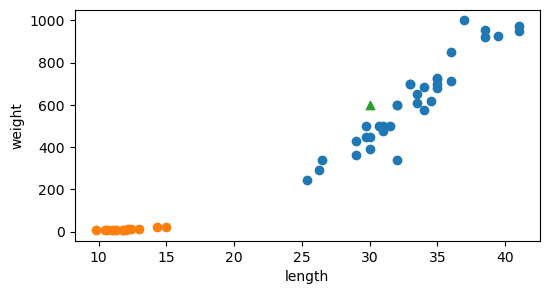

In [35]:
plt.figure(figsize=(6,3))
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30,600, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [31]:
# predict() 메서드 
# 새로운 데이터의 정답을 예측
# fit() 메서드와 마찬가지로 리스트의 리스트로 전달해야함.
kn.predict([[30,600]])

# 1 반환 >> 도미로 예상

c:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1])

In [ ]:
# k-최근접 이웃 알고리즘의 단점

# k-최근점 이웃 알고리즘은 새로운 데이터에 대해 예측할 때 가장 가까운 직선 거리에
# 어떤 데이터가 있는지 살피기만 해도 됨.

# 이런 특징 때문에 데이터가 아주 많은 경우 사용하기 어려움.
# 데이터가 크기 때문에 메모리가 많이 필요하고 직선거리를 계산하는 데도 많은 시간 필요

In [32]:
print(kn._fit_X)
print(kn._y)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [33]:
# 가까운 데이터 몇 개를 참고할까??
# KNeighborsClassifier 클래스의 기본값은 5!
# n_neighbors 매개변수로 바꿀 수 있음

kn49 = KNeighborsClassifier(n_neighbors=49)

# 참고 데이터를 49개로 한 k-최근접 이웃 모델에 fish_data를 적용하면
# fish_data에 있는 모든 생선을 사용해서 예측하게 됨.
# fish_data의 데이터 49개 중에 도미가 35개로 다수를 차지하여
# 어떤 데이터를 넣어도 무조건 도미로 예측

In [34]:
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

c:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7142857142857143

In [ ]:
# **''특성''은 데이터를 표현하는 하나의 성질. 
#  >> 생선 데이터를 생선의 길이와 무게의 특성으로 나타냄
# ** 머신러닝 알고리즘이 데이터에서 규칙을 찾는 과정 == 훈련 / sklearn. fit() 메서드
# ** k-최근접 이웃 알고리즘(K-nearest neighbors) 가장 간단한 머신러닝 알고리즘 중 하나
# > 어떤 규칙을 찾기보단 전체 데이터를 메모리에 가지고 있는 게 전부임
# ** 머신러닝 프로그램에서 알고리즘이 구현된 객체 == 모델 (알고리즘 자체를 모델이라고 하기도 함)
# ** 정확도 : 정확한 답을 몇 개 맞혔는지 백분율로 나타낸 값. sklearn 0~1사이의 값
# >> 정확도 = (정확히 맞힌 개수) / (전체 데이터 개수)

In [ ]:
# ** scikit-learn

# ** KNeighborsClassifier()는  k-최근접 이웃 분류 모델을 만드는 사이킷런 클래스
# ** n_neighbors 매개변수로 이웃의 개수를 지정함. 지정값 == 5
# ** p 매개변수로 거리를 재는 방법 지정 
# >> 1인경우 맨해튼 거리(http://bit.ly/man_distance) 사용
# >> 2인경우 유클리디낭 거리 (http://bit.ly/euc_distance) 사용
# >> 기본값은 2

# ** n_jobs를 매개변수로 사용할 CPU 코어 지정할 수 있음.
# >> -1로 설정하면 모든 CPU 코어 사용
# >> 이웃 간의 거리 계산 속도를 높일 수 있지만 fit() 메서드에는 영향이 없음.
# >> 기본값 1


# ** fit()은 사이킷런 모델을 훈련하고 예측할 떄 사용하는 메서드. 
#   특성 데이터 하나만 매개변수로 받음

# ** predict()는 사이킷런 모델을 훈련하고 예측할 때 사용하는 메서드.
#   특성 데이터 하나만 매개변수로 받음.

# ** score()는 훈련도니 사이킷런 모델의 성능 측정.
#   처음 두 매개변수로 특성과 정답 데이터를 전달함.
#   이 메서드는 먼저 predict() 메서드로 예측을 수행한 다음 분류 모델일 경우
#   정답과 비교하여 올바르게 예측한 개수의 비율 반환

In [ ]:
# 그래프 그리는 클래스 및 함수
# matplotlib >> scatter (산점도)

확인문제

In [ ]:
1. 데이터를 표현하는 하나의 성질 .(특성) 
예를 들어 국가 데이터의 경우 인구 수, GDP, 면적 등이 하나의 국가를 나타냄.
머신러닝에서 이런 성질을 무엇이라고 명명하는지

1. 특성 2.특질 3.개성 4.요소

In [ ]:
2. 가장 가까운 이웃을 참고하여 정답을 예측하는 알고리즘이 구현된 사이킷런 클래스

k-최근접 이웃 알고리즘
k-nearest neighbors 

Class 이름은!!
KNeighborsClassifier

In [ ]:
3. 사이킷런 모델을 훈련할 때 사용하는 메서드
fit()

확인 Score
예측 predict

In [6]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [7]:
for n in range(5,50):
    # k-최근접 이웃 개수 설정
    kn.n_neighbors = n
    # 점수 계산
    score = kn.score(fish_data, fish_target)
    # 100% 정확도에 미치지 못하는 이웃 개수 출력
    if score < 1:
        print(n,score)
        break

18 0.9795918367346939


c:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`